In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/ICE - Coding/ice_class_raw_data.csv")
data.head()

#X = data.drop(['ces_y', 'timeyearmonth_x'], axis=1)
#y = data.filter(["ces_y"])

# Feature Matrix
X = data.iloc[:, 1:-1].values
  
# Data labels
y = data.iloc[:, -1:].values

In [ ]:
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pca = PCA()
# fit the function to our image arrays
pca.fit(X);

In [ ]:
# explained get the cumalitive sum of the explained variance ratio for each principle component
evr = np.cumsum(pca.explained_variance_ratio_)
# plot the explained variance ratio
fig = go.Figure(data=go.Scatter(y = evr,line=dict(color='#ff70db')))
fig.update_layout(title='Explained Variance Ratio After PCA',
                   xaxis_title='Number of Principle Components',
                   yaxis_title='Cumalitive Explained Variance Ratio')
fig.show()

In [ ]:
pca = PCA(4)
pca.fit(X)

PCA(n_components=4)

In [ ]:
X_pca = pca.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.1, random_state=1)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1, random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=1)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1, random_state=1)

In [ ]:
print(len(x_train), len(x_val), len(x_test))

4779 532 591


In [ ]:
import sklearn 
import torch
scaler=sklearn.preprocessing.StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_val=scaler.fit_transform(x_val)

import numpy as np
x_train=torch.from_numpy(x_train.astype(np.float32))
x_test=torch.from_numpy(x_test.astype(np.float32))
x_val=torch.from_numpy(x_val.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))
y_val=torch.from_numpy(y_val.astype(np.float32))

y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)
y_val=y_val.view(y_val.shape[0],1)

In [ ]:
class Logistic_Reg_model(torch.nn.Module):
 def __init__(self,no_input_features):
   super(Logistic_Reg_model,self).__init__()
   self.layer1=torch.nn.Linear(no_input_features,20)
   self.layer2=torch.nn.Linear(20,1)
 def forward(self,x):
   y_predicted=self.layer1(x)
   y_predicted=torch.sigmoid(self.layer2(y_predicted))
   return y_predicted

model=Logistic_Reg_model(4)

In [ ]:
criterion=torch.nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [ ]:
import matplotlib.pyplot as plt
loss_values = []
val_accuracies = []
val_losses = []
number_of_epochs=200
for epoch in range(number_of_epochs):
    y_prediction=model(x_train)
    loss=criterion(y_prediction,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1)%10 == 0:
        y_pred=model(x_val)
        with torch.no_grad():
            val_loss = criterion(y_pred, y_val)
            y_pred_class=y_pred.round()
            val_accuracy=(y_pred_class.eq(y_val).sum())/float(y_val.shape[0])
            print('epoch:', epoch+1,', train loss=',round(loss.item(),4), 'Val loss=',round(val_loss.item(), 4), 'val accuracy=', round(val_accuracy.item(), 4))
            val_accuracies.append(round(val_accuracy.item(), 4))
            val_losses.append(round(val_loss.item(), 4))
        loss_values.append(loss.item())
    

epoch: 10 , train loss= 0.5818 Val loss= 0.5724 val accuracy= 0.8308
epoch: 20 , train loss= 0.5585 Val loss= 0.5483 val accuracy= 0.8402
epoch: 30 , train loss= 0.5391 Val loss= 0.528 val accuracy= 0.8421
epoch: 40 , train loss= 0.5228 Val loss= 0.511 val accuracy= 0.844
epoch: 50 , train loss= 0.5091 Val loss= 0.4965 val accuracy= 0.8459
epoch: 60 , train loss= 0.4975 Val loss= 0.4842 val accuracy= 0.8496
epoch: 70 , train loss= 0.4876 Val loss= 0.4737 val accuracy= 0.8496
epoch: 80 , train loss= 0.4792 Val loss= 0.4646 val accuracy= 0.8496
epoch: 90 , train loss= 0.4719 Val loss= 0.4568 val accuracy= 0.8496
epoch: 100 , train loss= 0.4657 Val loss= 0.45 val accuracy= 0.8496
epoch: 110 , train loss= 0.4603 Val loss= 0.4441 val accuracy= 0.8515
epoch: 120 , train loss= 0.4557 Val loss= 0.4389 val accuracy= 0.8515
epoch: 130 , train loss= 0.4516 Val loss= 0.4343 val accuracy= 0.8515
epoch: 140 , train loss= 0.4481 Val loss= 0.4303 val accuracy= 0.8534
epoch: 150 , train loss= 0.445 Val

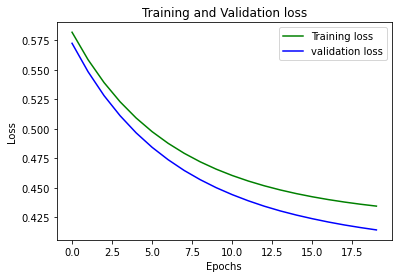

In [ ]:
plt.plot(loss_values, 'g', label='Training loss')
plt.plot(val_losses, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

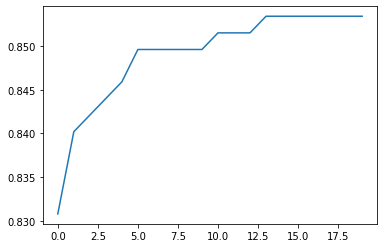

In [ ]:
plt.plot(val_accuracies)

In [ ]:
with torch.no_grad():
 y_pred=model(x_test)
 y_pred_class=y_pred.round()
 accuracy=(y_pred_class.eq(y_test).sum())/float(y_test.shape[0])
 print(round(accuracy.item(), 4))

0.8613


### Using MLP

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ICE - Coding/ice_class_raw_data.csv")
data.head()

,timeyearmonth_x,bug_rate,config_rate,hw_rate,esc_rate,init_sev_1_2_rate,diag_rate,sw_not_bug_rate,ces_y
0,2016-08,8.333333,45.833333,0.000000,4.166667,4.166667,8.333333,41.666667,0
1,2016-09,9.523810,52.380952,4.761905,0.000000,0.000000,0.000000,19.047619,0
2,2016-10,11.111111,50.000000,2.777778,5.555556,8.333333,5.555556,27.777778,0
3,2016-11,17.391304,17.391304,4.347826,4.347826,4.347826,13.043478,30.434783,0
4,2016-12,16.000000,48.000000,8.000000,8.000000,0.000000,12.000000,24.000000,0


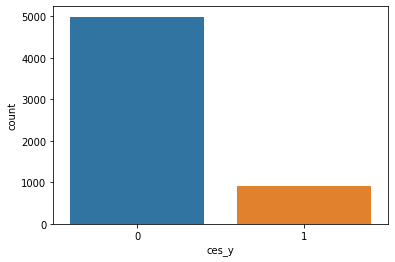

In [ ]:
sns.countplot(x = 'ces_y', data=data)

In [ ]:
# Feature Matrix
X = data.iloc[:, 1:-1].values
  
# Data labels
y = data.iloc[:, -1:].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=1)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
EPOCHS = 3
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [ ]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## val data    
val_data = TrainData(torch.FloatTensor(X_val), 
                       torch.FloatTensor(y_val))

## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [ ]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 7.
        self.layer_1 = nn.Linear(7, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        #x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [ ]:
model = BinaryClassification()
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

BinaryClassification(
  (layer_1): Linear(in_features=7, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
losses = []
accuracies = []
val_losses = []
val_accuracies = [] 
model.train()
model = model.cuda()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        X_batch = X_batch.cuda()
        y_batch = y_batch.cuda()
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch)
        acc = binary_acc(y_pred, y_batch)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    
    
    valid_loss = 0.0
    valid_acc = 0.0
    model.eval()   
    for X_val_batch, y_val_batch in val_loader:
        # Forward Pass
        X_val_batch = X_val_batch.cuda()
        y_val_batch = y_val_batch.cuda()

        y_val_pred = model(X_val_batch)
        # Find the Loss
        val_loss = criterion(y_val_pred, y_val_batch)
        #Find the accuracy
        val_acc = binary_acc(y_val_pred, y_val_batch)
        # Calculate Loss
        valid_loss += val_loss.item()
        valid_acc += val_acc.item()
    val_losses.append(valid_loss/len(val_loader))
    val_accuracies.append(valid_acc/len(val_loader))
    losses.append(epoch_loss/len(train_loader))
    accuracies.append(epoch_acc/len(train_loader))
    #print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')
    print(f'Epoch {e+0:03}: | Training Loss: {epoch_loss/len(train_loader):.5f} | Validation Loss: {valid_loss/len(val_loader):.3f} | Validation Accuracy: {valid_acc/len(val_loader):.3f}')

Epoch 001: | Training Loss: 0.61668 | Validation Loss: 0.535 | Validation Accuracy: 77.556
Epoch 002: | Training Loss: 0.40455 | Validation Loss: 0.349 | Validation Accuracy: 85.778
Epoch 003: | Training Loss: 0.37883 | Validation Loss: 0.367 | Validation Accuracy: 85.889


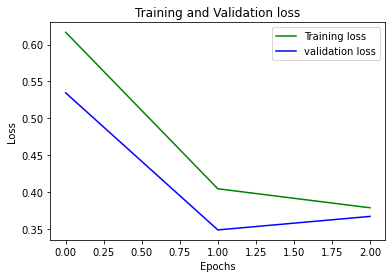

In [ ]:
plt.plot(losses, 'g', label='Training loss')
plt.plot(val_losses, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

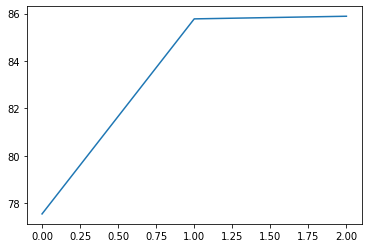

In [ ]:
plt.plot(val_accuracies)

In [ ]:
y_pred_list = []
model.eval()
model = model.cpu()
with torch.no_grad():
    for X_batch in test_loader:
        y_test_pred = model(X_batch)
        test_acc = binary_acc(y_test_pred, y_test)
print(test_acc)

AttributeError: ignored

In [ ]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       512
           1       0.38      0.04      0.07        79

    accuracy                           0.86       591
   macro avg       0.62      0.51      0.50       591
weighted avg       0.80      0.86      0.81       591

